# Primera entrega

## Contexto de la aplicación

Nuestra aplicación o desarrollo consistirá en un sistema de clasificación multiclase de imágenes del Alfabeto del lenguaje de Señas inglés, es decir, contamos con 27 clases diferentes (uno por cada letra) numeradas (etiquetadas) del 0 al 26, donde el 0 es una etiqueta vacía, el 1 sería el índice correspondiente a la letra A mientras que el 26 sería el correspondiente a la letra Z.

Es decir, el sistema será capaz de predecir la seña correspondiente a cada letra, individualmente, más no el lenguaje como tal, la analogía correcta sería por ejemplo que hay varios idiomas que comparten el mismo alfabeto o gran parte del mismo, pero las palabras son distintas, en este caso, buscamos clasificar cada elemento del alfabeto de señas, es decir, cada letra o dicho en otras palabras “la representación de cada letra en el alfabeto del lenguaje de señas” más no las palabras de dicho lenguaje.

Las aplicaciones o usos que puede llegar a tener este sistema de clasificación son bastante amplios, puede permitir a las personas aprender o educarse en lo que respecta a este lenguaje como también facilitar la comunicación entre las personas, en términos pueden haber buenos beneficios.


## Objetivo de machine learning

Como se ha venido comentando, contamos con un conjunto de fotos de manos de $28\times28$ píxeles (784 características), donde en cada imagen hay una mano realizando una posición del alfabeto del lenguaje de señas inglés (Difiere en el español prácticamente en la ausencia de la letra "ñ"), cada imagen está etiquetada con un número que varía entre 0 y 26 (Que es el índice de la letra a la que corresponde la posición excepto 0). 
Dada una imagen de una mano haciendo una letra del alfabeto del lenguaje de señas inglés, queremos clasificarla en alguna de las letras del alfabeto inglés (Proyecto que podría extenderse para conseguir imágenes de la letra ñ para países hispanohablantes).




## Descripción del dataset

Cada característica (Columna) es de tipo int64 con el siguiente rango: $[0,255]$.
Este dataset se encuentra dividido por defecto en dos subconjuntos: Entrenamiento y Test, los subconjuntos tienen 12844 y 4267 muestras respectivamente.
El dataset completo tiene un tamaño en disco de 49.5 MB.
La cantidad de muestras por clase es bastante balanceada, puesto que todas están en el rango $(600,700)$, además se puede evidenciar en el histograma.
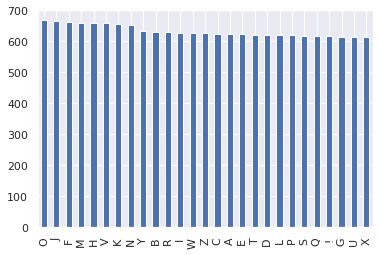


## Métricas de desempeño (de machine learning y negocio)

Se usará la matriz de confusión normalizada para hacer un análisis sobre qué tan bien está clasificando un modelo, y ver con qué clases puede estar confundiéndose a la hora de clasificar.
Como medida global se usará la exactitud (Accuracy) sobre cada una de las clases, sin embargo se estudiará más a profundidad cada clase con la sensibilidad (Recall) y la precisión (Positive Predictive Value).

## Referencias y resultados previos

* Curso de Fundamentos de Deep Learning (UdeA) del profesor Raúl Ramos Pollán: https://rramosp.github.io/2021.deeplearning/content/M02.html 
* C. Bishop, Pattern Recognition and Machine Learning
* Haykin, S. S., Haykin, S. S., Haykin, S. S., & Haykin, S. S. (2009). Neural networks and learning machines (Vol. 3). Upper Saddle River, NJ, USA:: Pearson.

# Segunda entrega

## Importación de las librerías a usar

In [ ]:
# Generación del alfabeto inglés
import string
alphabet = list(string.ascii_uppercase)
alphabet = ['!'] + alphabet

# Análisis exploratorio y estructura de la información
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from itertools import product

# Métricas de error y metodología de validación
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, train_test_split

# Para embellecer las gráficas
sns.set()


import tensorflow as tf
%matplotlib inline
%load_ext tensorboard

# from sklearn.datasets import *
# from local.lib import mlutils
# tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Lectura y exploración del dataset

## Dataset para entrenamiento

In [ ]:
df_train = pd.read_csv ('https://drive.google.com/uc?id=1NuWgW9m4n7lzNATu54eBEiFFsZYZ9AFU&export=download')

In [ ]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [ ]:
np.array(X_train.iloc[1000]).reshape(28,28)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,   7,   1, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254, 254, 208, 254, 254, 254, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 254,  46, 255, 253, 254,   1, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 254, 255, 255,   1,   0, 255, 118, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
          0, 255,   1, 253, 255,   1, 255, 254, 255, 255, 255, 255, 255,
        255, 255],
       [25

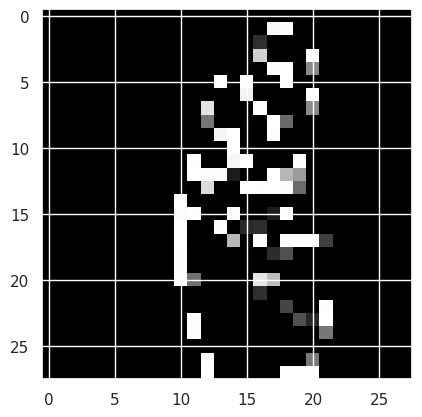

In [ ]:
plt.imshow(np.array(X_train.iloc[1000]).reshape((28,28)), cmap="binary")
plt.show()

## Dataset para test

In [ ]:
df_test = pd.read_csv ('https://drive.google.com/uc?id=1ZLuVmov0_mU83LBWxtXvYwPWxh5FfIEc&export=download')

In [ ]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

## Análisis de los dataset unidos

In [ ]:
df = pd.concat([df_train, df_test])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4263,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4264,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4265,255,255,255,252,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.label.apply(lambda index_letter: alphabet[ index_letter ])

0        !
1        !
2        !
3        !
4        !
        ..
17106    Z
17107    Z
17108    Z
17109    Z
17110    Z
Name: label, Length: 17111, dtype: object

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

ñ = 14

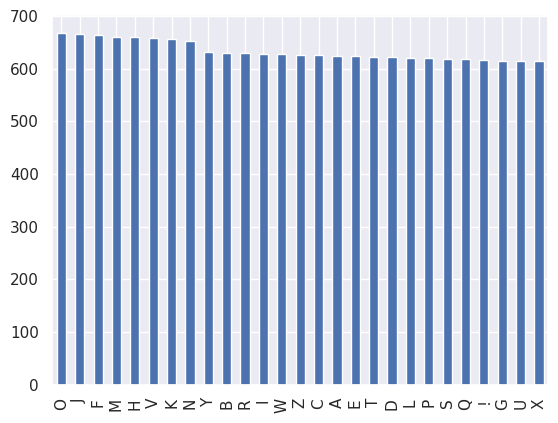

In [ ]:
counts = df.label.apply(lambda index_letter: alphabet[ index_letter ]).value_counts()
counts.plot(kind='bar')
plt.show()

In [ ]:
np.unique(df.label.apply(lambda index_letter: alphabet[ index_letter ]))

array(['!', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
       'Z'], dtype=object)

Se está trabajando un dataset que por defecto ya viene partido en dos conjuntos: Train y Test.
La cantidad de muestras que hay en el conjunto de entrenamiento es de 12844 y en el de test hay 4267.
La última columna (`label`) corresponde a las diferentes clases que tiene este problema de clasificación.

**NO TIENE DATOS FALTANTES**

In [ ]:
k = df.isna().sum()
((round(k/df.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k))], sep='%')

pixel_0      0%
pixel_1      0%
pixel_2      0%
pixel_3      0%
pixel_4      0%
             ..
pixel_780    0%
pixel_781    0%
pixel_782    0%
pixel_783    0%
label        0%
Length: 785, dtype: object

Se escalan los conjuntos $X_{train}$ y $X_{test}$ con `MinMaxScaler` en base a $X_{train}$

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

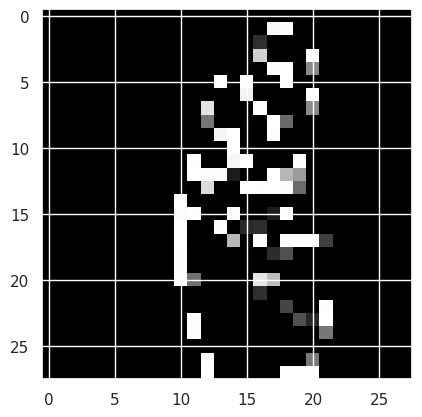

In [ ]:
plt.imshow(np.array(X_train_scaled.iloc[1000]).reshape((28,28)), cmap="binary")
plt.show()

## Redimensionamiento
Hasta este punto, cada imagen se representa como un vector, sin embargo, dado que en el modelo de red neuronal convolucional nos interesa extraer información sobre la relación de un pixel con su alrededor, crearemos un nuevo dataset redimensionado para este modelo.

In [ ]:
X_train_scaled_2d = np.reshape(np.array(X_train_scaled), (X_train_scaled.shape[0],28,28))
y_train_array = np.array(y_train)

X_test_scaled_2d = np.reshape(np.array(X_test_scaled), (X_test_scaled.shape[0],28,28))
y_test_array = np.array(y_test)

image = X_train_scaled_2d[1000]

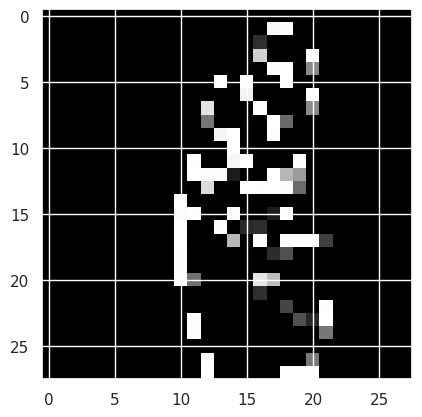

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image, cmap='binary')

# Show the plot
plt.show()

#Modelos a considerar
* Feedforward neural network
* Convolutional neural network

Definamos una función experimentos, la metodología de validación a usar es "KFolds"

## Feedforward neural network

In [ ]:
def get_model(num_classes=2, nlayers=3, lsize=64, compile=True, dropout=None):
    print("using",num_classes,"classes")
    print(f"Entrenando modelo lsize = {lsize} - nlayers = {nlayers}")
    inputs = tf.keras.Input(shape=(784), name="input_1")
    
    layers = inputs
    for _ in range(nlayers):
        layers = tf.keras.layers.Dense(lsize, activation=tf.nn.relu)(layers)
        if dropout is not None:
            layers = tf.keras.layers.Dropout(dropout)(layers)
            
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [ ]:
def experiments_dense_model(X, y):
    """
    Función que realiza los experimentos con el modelo 
    red neuronal convolucional, estos experimentos constan de:
    - Estrategia de validacion: K-Fold
    - Etapa de entrenamiento
    - Fase de validación
    X_train: Matriz 3D (i,j,k) donde la matriz i representa la imagen i y j y k los subíndices de la imagen
    y_train: Vector de numpy con la variable de salida
    retorna: Matriz de confusion, recall, precision
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    nlayers = [2**i for i in range(5)]
    lsize = [2**i for i in range(5, 10)]



    # Nuestro hiperparámetro a considerar será si se aplica max_pooling o no
    for n_layers, l_size in product(nlayers, lsize):
        #Metodología de validación
        

        #Entrenamiento del modelo
        model = get_model(num_classes=27, lsize=l_size, nlayers=n_layers)
        model.fit(X_train, y_train, epochs=128, verbose=0)

        print(f"Modelo lsize = {l_size} - nlayers = {n_layers}")
        print("Entrenamiento")
        model.evaluate(x=X_train,y=y_train)
        print("Validación")
        model.evaluate(x=X_test,y=y_test)


       
    

## Convolutional neural network

In [ ]:
def get_conv_model(num_classes=3, img_size=32, channels=3, use_maxpooling=True, compile=True, filters_per_layer=[32,16], size_filter_per_layer=[7,5]):
    print ("using",num_classes,"classes")
    print(f"Entrenando modelo max_pooling = {use_maxpooling} - size_filter_per_layer = {size_filter_per_layer} - filters_per_layer = {filters_per_layer}")
    #inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")

    inputs = tf.keras.Input(shape=(img_size,img_size,channels), name="input_1")
    layers = tf.keras.layers.Conv2D(filters_per_layer[0],(size_filter_per_layer[0],size_filter_per_layer[0]), activation="relu",padding='same')(inputs)

    for n_filters, size_filters in zip(filters_per_layer[1:], size_filter_per_layer[1:]):
        layers = tf.keras.layers.Conv2D(n_filters,(size_filters,size_filters), activation="relu", padding='same')(layers)
        if use_maxpooling:
            layers = tf.keras.layers.MaxPool2D((2,2))(layers)

    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(128, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dense(128, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.5)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [ ]:
def experiments_conv_model(X, y):
    """
    Función que realiza los experimentos con el modelo 
    red neuronal convolucional, estos experimentos constan de:
    - Estrategia de validacion: K-Fold
    - Etapa de entrenamiento
    - Fase de validación
    X_train: Matriz 3D (i,j,k) donde la matriz i representa la imagen i y j y k los subíndices de la imagen
    y_train: Vector de numpy con la variable de salida
    retorna: Matriz de confusion, recall, precision
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    max_pooling_hyperparams = [True, False]
    size_filter_per_layer_hyperparams = [
        [7,5,3],
        [9,7,5,3],
        [11,9,7,5,3],
    ]

    filters_per_layer_hyperparams = [
        [32, 16, 8],
        [64,32, 16, 8],
        [128,64,32, 16, 8],

    ]

    # Nuestro hiperparámetro a considerar será si se aplica max_pooling o no
    for max_pooling, (size_filter_per_layer, filters_per_layer) in product(max_pooling_hyperparams, zip(size_filter_per_layer_hyperparams, filters_per_layer_hyperparams)):
        #Metodología de validación
        

        #Entrenamiento del modelo
        model = get_conv_model(num_classes=27, img_size=28, channels=1, use_maxpooling=max_pooling, size_filter_per_layer=size_filter_per_layer, filters_per_layer=filters_per_layer)
        model.fit(X_train, y_train, epochs=4)

        print(f"Modelo max_pooling = {max_pooling} - size_filter_per_layer = {size_filter_per_layer} - filters_per_layer = {filters_per_layer}")
        model.evaluate(x=X_test,y=y_test)


       
    

## Experimentación

Modelo convolucional

In [ ]:
resultados_conv_model = experiments_conv_model(X_train_scaled_2d, y_train_array)

using 27 classes
Entrenando modelo max_pooling = True - size_filter_per_layer = [7, 5, 3] - filters_per_layer = [32, 16, 8]
Epoch 1/4
269/269 [==============================] - 47s 172ms/step - loss: 2.9448 - accuracy: 0.1385
Epoch 2/4
269/269 [==============================] - 46s 170ms/step - loss: 0.8818 - accuracy: 0.7135
Epoch 3/4
269/269 [==============================] - 46s 170ms/step - loss: 0.3996 - accuracy: 0.8641
Epoch 4/4
269/269 [==============================] - 47s 173ms/step - loss: 0.2477 - accuracy: 0.9149
Modelo max_pooling = True - size_filter_per_layer = [7, 5, 3] - filters_per_layer = [32, 16, 8]
133/133 [==============================] - 4s 32ms/step - loss: 0.1021 - accuracy: 0.9672
using 27 classes
Entrenando modelo max_pooling = True - size_filter_per_layer = [9, 7, 5, 3] - filters_per_layer = [64, 32, 16, 8]
Epoch 1/4
269/269 [==============================] - 178s 656ms/step - loss: 3.2966 - accuracy: 0.0358
Epoch 2/4
269/269 [=============================

Modelo perceptrón multicapa

In [ ]:
experiments_dense_model(X_train_scaled, y_train_array)

using 27 classes
Entrenando modelo lsize = 32 - nlayers = 1
Modelo lsize = 32 - nlayers = 1
Entrenamiento
269/269 [==============================] - 0s 1ms/step - loss: 3.2949 - accuracy: 0.0399
Validación
133/133 [==============================] - 0s 1ms/step - loss: 3.2982 - accuracy: 0.0370
using 27 classes
Entrenando modelo lsize = 64 - nlayers = 1
Modelo lsize = 64 - nlayers = 1
Entrenamiento
269/269 [==============================] - 1s 1ms/step - loss: 3.2949 - accuracy: 0.0399
Validación
133/133 [==============================] - 0s 1ms/step - loss: 3.2982 - accuracy: 0.0370
using 27 classes
Entrenando modelo lsize = 128 - nlayers = 1
Modelo lsize = 128 - nlayers = 1
Entrenamiento
269/269 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Validación
133/133 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9707
using 27 classes
Entrenando modelo lsize = 256 - nlayers = 1
Modelo lsize = 256 - nlayers = 1
Entrenamiento
269/2

In [ ]:
mlp_accuracy_training = """
0.0399
0.0399
1.0000
1.0000
1.0000
0.2449
0.8308
0.9998
1.0000
0.9866
0.8331
0.9947
0.9608
1.0000
0.9943
0.9147
0.0399
0.8015
0.6390
0.0399
0.0399
0.0399
0.0399
0.0399
0.0399
"""

mlp_accuracy_testing = """
0.0370
0.0370
0.9707
0.9766
0.9736
0.2241
0.7686
0.9998
0.9769
0.9507
0.7679
0.9947
0.9148
0.9830
0.9290
0.8410
0.0399
0.7306
0.5638
0.0370
0.0370
0.0370
0.0370
0.0370
0.0370
"""

In [ ]:
mlp_accuracy_training = np.array(mlp_accuracy_training.split("\n")[1:-1]).astype(float)
mlp_accuracy_testing = np.array(mlp_accuracy_testing.split("\n")[1:-1]).astype(float)

In [ ]:
np.argmin(np.abs(mlp_accuracy_training - mlp_accuracy_testing))

7

## Comparación mejores modelos

### Perceptrón multicapa

In [ ]:
mlp_best_model = get_model(num_classes=27, nlayers=2, lsize=128)

using 27 classes
Entrenando modelo lsize = 128 - nlayers = 2


In [ ]:
mlp_best_model.fit(X_train_scaled, y_train_array, epochs=12)

Epoch 1/12
402/402 [==============================] - 2s 4ms/step - loss: 2.9211 - accuracy: 0.1868
Epoch 2/12
402/402 [==============================] - 2s 4ms/step - loss: 1.4526 - accuracy: 0.6039
Epoch 3/12
402/402 [==============================] - 3s 7ms/step - loss: 0.8550 - accuracy: 0.7544
Epoch 4/12
402/402 [==============================] - 2s 4ms/step - loss: 0.6025 - accuracy: 0.8245
Epoch 5/12
402/402 [==============================] - 2s 4ms/step - loss: 0.4937 - accuracy: 0.8535
Epoch 6/12
402/402 [==============================] - 2s 4ms/step - loss: 0.4069 - accuracy: 0.8766
Epoch 7/12
402/402 [==============================] - 2s 4ms/step - loss: 0.3406 - accuracy: 0.8970
Epoch 8/12
402/402 [==============================] - 2s 4ms/step - loss: 0.3006 - accuracy: 0.9098
Epoch 9/12
402/402 [==============================] - 2s 4ms/step - loss: 0.2642 - accuracy: 0.9186
Epoch 10/12
402/402 [==============================] - 3s 7ms/step - loss: 0.2446 - accuracy: 0.9253

In [ ]:
y_test_est = mlp_best_model.predict(X_test_scaled)

134/134 [==============================] - 0s 2ms/step


In [ ]:
mlp_best_model.evaluate(X_test_scaled, y_test_array)

134/134 [==============================] - 1s 3ms/step - loss: 0.2058 - accuracy: 0.9379


[0.2058003544807434, 0.9378954768180847]

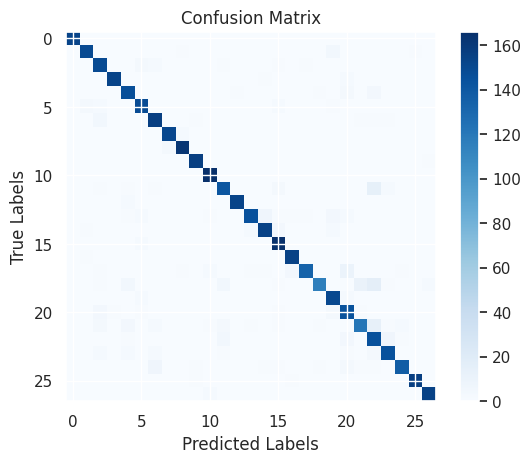

In [ ]:
cm = confusion_matrix(y_test_array, np.argmax(y_test_est, axis=1))

# Display confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Red neuronal convolucional

In [ ]:
conv_best_model = get_conv_model(num_classes=27, channels=1, img_size=28, filters_per_layer=[32,16,8], size_filter_per_layer=[7,5,3])

using 27 classes
Entrenando modelo max_pooling = True - size_filter_per_layer = [7, 5, 3] - filters_per_layer = [32, 16, 8]


In [ ]:
conv_best_model.fit(X_train_scaled_2d, y_train_array, epochs=12)

Epoch 1/12
402/402 [==============================] - 87s 209ms/step - loss: 2.2565 - accuracy: 0.3321
Epoch 2/12
402/402 [==============================] - 67s 166ms/step - loss: 0.5163 - accuracy: 0.8293
Epoch 3/12
402/402 [==============================] - 66s 164ms/step - loss: 0.2415 - accuracy: 0.9211
Epoch 4/12
402/402 [==============================] - 74s 184ms/step - loss: 0.1486 - accuracy: 0.9499
Epoch 5/12
402/402 [==============================] - 66s 165ms/step - loss: 0.1061 - accuracy: 0.9671
Epoch 6/12
402/402 [==============================] - 66s 164ms/step - loss: 0.0837 - accuracy: 0.9729
Epoch 7/12
402/402 [==============================] - 67s 166ms/step - loss: 0.0687 - accuracy: 0.9778
Epoch 8/12
402/402 [==============================] - 68s 168ms/step - loss: 0.0620 - accuracy: 0.9802
Epoch 9/12
402/402 [==============================] - 67s 167ms/step - loss: 0.0432 - accuracy: 0.9864
Epoch 10/12
402/402 [==============================] - 67s 166ms/step - l

In [ ]:
y_test_est = conv_best_model.predict(X_test_scaled_2d)

134/134 [==============================] - 4s 31ms/step


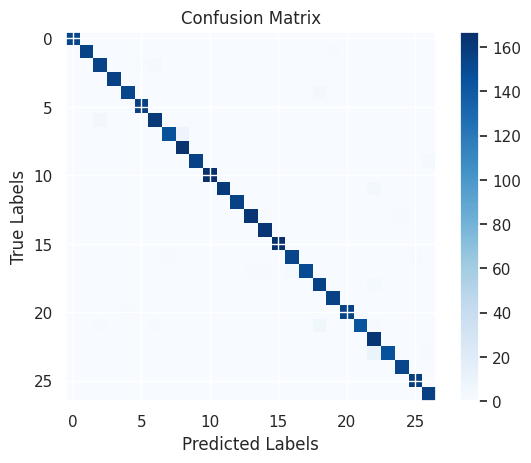

In [ ]:
cm = confusion_matrix(y_test_array, np.argmax(y_test_est, axis=1))

# Display confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
conv_best_model.evaluate(X_test_scaled_2d, y_test_array)

134/134 [==============================] - 8s 53ms/step - loss: 0.0350 - accuracy: 0.9873


[0.035024140030145645, 0.9873447418212891]